# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bonifasius Joseph Ardian Ekanaradipa
- **Email:** n2r2dipa@gmail.com
- **ID Dicoding:** youknowmehaii

## Menentukan Pertanyaan Bisnis

- Bagaimana musim dan cuaca mempengaruhi volume menyewa sepeda.
- Apakah terdapat hubungan suhu dengan musim dan cuaca pada penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset day.csv
day_df = pd.read_csv('day.csv', delimiter=',')

In [149]:
# kolom set menampilkan 50 tabel value guna membaca garis besar data
day_df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- [instant] = log data dari pemakian sepeda pertama hingga akhir pengambilan data.
- [dteday] = date atau tanggal peminjaman sepeda dilakukan.
- [season] = musim yang tercatat.
- [yr] = year atau tahun.
- [holiday] = Tanggal Hari Libur dimana 1 = libur, 0 = tidak.
- [weekday] = Hari Biasa standard indikator 0 = minggu hingga 6 = sabtu.
- [workingday] = Apakah hari kerja atau bukan dimana 1 = hari kerja dan 0 = tidak.
+ [weathersit] =
    - 1: Cerah, Cerah Berawan, Cerah Berawan, Cerah Berawan
    - 2: Kabut + Mendung, Kabut + Cerah Berawan, Kabut + Cerah Berawan, Kabut
    - 3: Salju Ringan, Hujan Ringan + Petir + Cerah Berawan, Hujan Ringan + Cerah Berawan
    - 4: Hujan Lebat + Es Batu + Petir + Kabut, Salju + Kabut
- [temp] = suhu sebenarnya udara dalam celsius yang dibagi 41(max)
- [atemp] = suhu yang dirasakan tidak sebenarnya yang dibagi 50(max)
- [hum] = kelembapan udara yang dibagi dengan 100(max)
- [windspeed] = kecepatan udara dibagi hingga 67(max)
- [casual] = terhitung sebagai user-notRegisterd
- [registered] = terhitung sebagai user-Registerd
- [cnt] = total keseluruhan user yang menggunakan penyewaan sepeda

### Assessing Data

**Assessing Data Hour.csv**

In [104]:
# Mengetahui apakah terdapat perbedaan data yang dihasilkan yang digunakan 
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- tipe data yang dihasilkan berupa Float(4), Integer(11), dan Object(1)
- data memiliki nilai yang sama sejumlah 731 dengan jumlah kolom 16 kolom
- seluruh data yang dihasilkan menghasilkan non-null artinya tidak ada data yang tidak berisi

In [68]:
# Mencari data yang kodong atau data yang tidak terisi pada da.csv
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- dari 731 entries data yang masuk tidak ada yang menghasilkan null
- tidak perlu melakukan tindakan mengisi data yang bernilai null

In [96]:
# Mencari data yang di duplikasi
day = day_df.duplicated().sum()
print("data duplikat day.csv: ", day)

data duplikat day.csv:  0


**Insight:**
- data tidak ada yang terduplikat sehingga tidak perlu melakukan langkah pembersihan

In [112]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- berdasarkan data diatas diketahui bahwa indeks suhu [temp] rata-rata 0.4953, kelembapan [hum] rata-rata pada 0.6278.
- indeks cuaca [weathersit] rata-rata 1.3953 dimana berkisar pada hari yang cerah atau pada hari berawan.
- diketahui pula pada kolom musim [season] rata-rata dengan indeks 2.4965
- indeks rata-rata pada tabel [workingday] ada pada nilai 0.6839 dengan sebaran data 0.4652
- indeks rata-rata pada tabel [weekday] ada pada nilai 2.9972 dengan sebaran data 2.0047
- indeks rata-rata pada tabel [holiday] ada pada nilai 0.0267 dengan sebaran data 0.1672
- nilai rata-rata paling besar terdapat pada kolom [casual], [registered], dan [cnt].

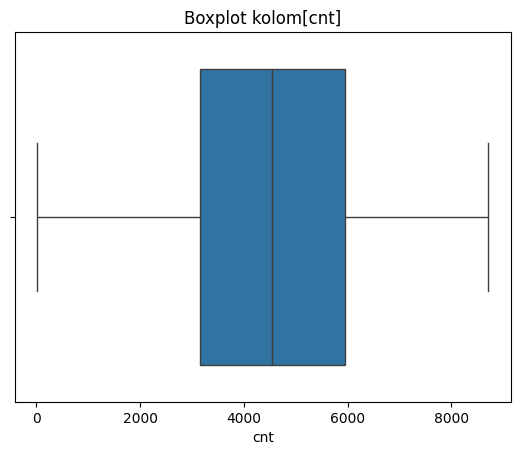

In [21]:
# Mencari Outliers kolom [cnt]
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot kolom[cnt]')
plt.show()

**Insight:**
- Tidak ada nilai Ouliers dalam kolom

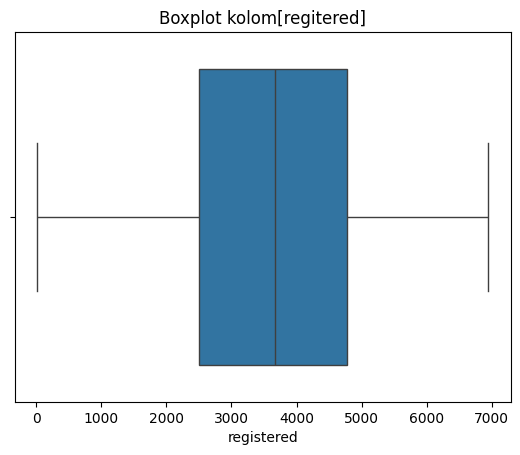

In [49]:
# Mencari kolom Outliers Kolom [registered]
sns.boxplot(x=day_df['registered'])
plt.title('Boxplot kolom[regitered]')
plt.show()

**Insight:**
- Tidak ada nilai Ouliers dalam kolom

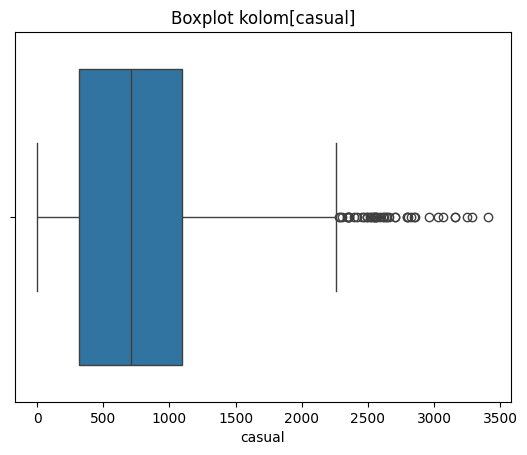

In [44]:
# Mencari nilai Outliers dalam kolom [casual
sns.boxplot(x=day_df['casual'])
plt.title('Boxplot kolom[casual]')
plt.show()

**Insight:**
- Terdapat nilai Outliers di dalam kolom 

### Cleaning Data

In [62]:
# Membersihkan nilai data yang memiliki Outliers
Q1 = (day_df['casual']).quantile(0.25)
Q3 = (day_df['casual']).quantile(0.75)
IQR = Q3 - Q1
# Mencari batas aras dan bawah
atas = Q3 + (1.5*IQR)
bawah = Q1 - (1.5*IQR)
# Menyimpan nilai maximum dan minimum
outliers_df = day_df[(day_df['casual'] < bawah) | (day_df['casual'] > atas)]
# Menghapus nilai outliers dengan kondisi yang sudah ditentukan diawal
day_df.drop(day_df[kondisi_kurang].index, inplace=True)
day_df.drop(day_df[kondisi_lebih].index, inplace=True)

**Insight:**
- membuat fungsi rumus untuk menghapus nilai data Outliers berdasarkan tabel Box-Plot
- dari Data sebelumnya diketahui bahwa data hanya memiliki Outliers lebih dari nilai Batas atas sehingga hanya mencari Batas atas data

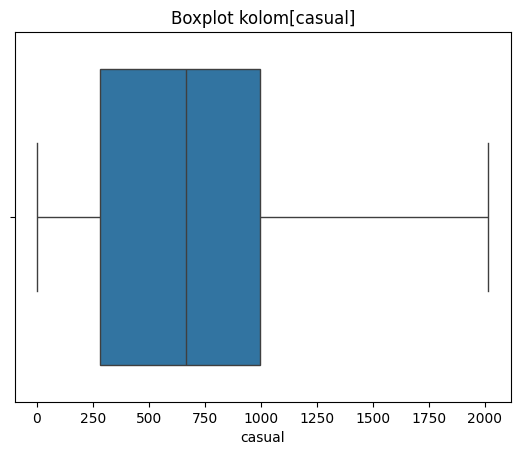

In [63]:
sns.boxplot(x=day_df['casual'])
plt.title('Boxplot kolom[casual]')
plt.show()

## Exploratory Data Analysis (EDA)

### Explore ...

In [64]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,353.328849,2.476831,0.467862,6.494768,0.026906,2.982063,0.745889,1.409567,0.485024,0.464981,0.629903,0.192286,692.766816,3595.376682,4288.143498
std,212.157677,1.132595,0.499339,3.540449,0.161929,1.895387,0.435686,0.552321,0.185233,0.165171,0.144338,0.078557,469.336360,1596.133881,1860.441163
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,170.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.325217,0.324479,0.520000,0.135571,282.000000,2415.000000,2927.000000
50%,344.000000,2.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.470000,0.462742,0.630833,0.182213,665.000000,3578.000000,4339.000000
75%,537.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.650000,0.603554,0.734167,0.235075,997.000000,4721.000000,5499.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2015.000000,6946.000000,8173.000000


**Insight:**
- Jumlah data berubah guna membersihkan Outliers
- tabel[temp] berkisar pada indeks 0.485 dengan suhu terendah 0.0591 dan tertinggi 0.8617
- kelembapan udara [hum] ada pada indeks rata-rata 0.6299 tertinggi pada 0.9725 dan terendah 0.0
- kisaran cuaca pada hari itu [weathersit] berkisar pada indeks rata-rata 1.4095
- terdapat perbedaan rata-rata pada [weekday] dan [workingday] sekitar 2.982 dan 0.7458
- tabel [holiday] berkisar pada rata-rata 0.0269 dengan sebaran data 0.1619
- jumlah penggunaan sepeda sejumlah 669 dengan pengguna terdaftar pada 669 dengan pengguna tidak terdaftar 669

## Visualization & Explanatory Analysis

### Pertanyaan 1:

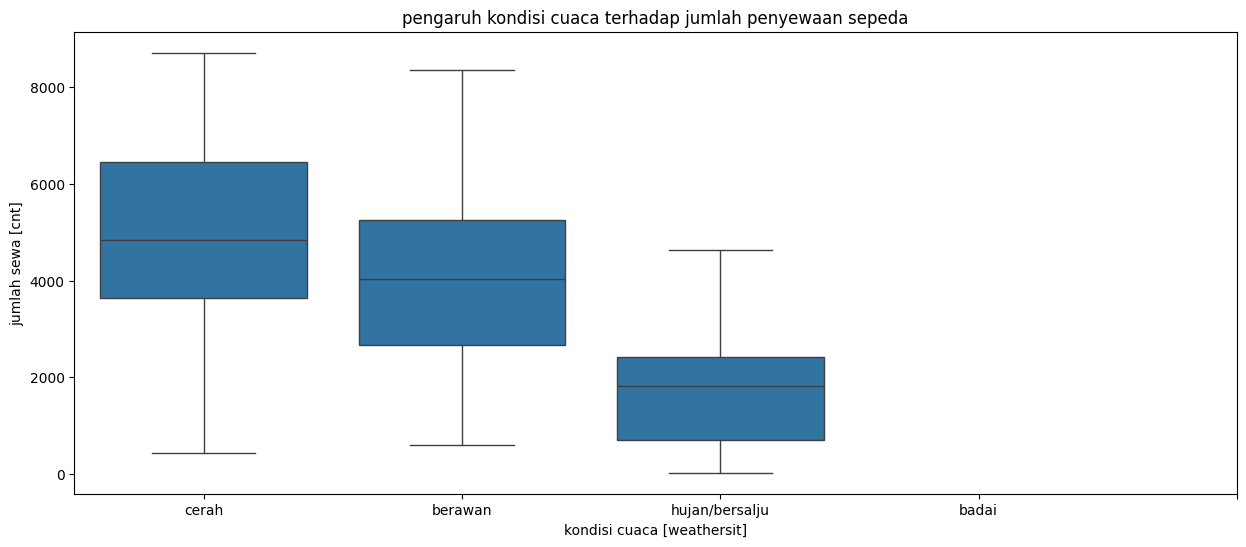

In [79]:
# Bagaimana musim dan cuaca mempengaruhi jumlah sepeda yang disewa

plt.figure(figsize=(15, 6))
sns.boxplot(x='weathersit', y='cnt', data =day_df)
plt.title('pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda')
plt.ylabel('jumlah sewa [cnt]')
plt.xlabel('kondisi cuaca [weathersit]')
plt.xticks([0, 1, 2, 3, 4], ['cerah', 'berawan', 'hujan/bersalju', 'badai', ''], rotation = 0)
plt.show()

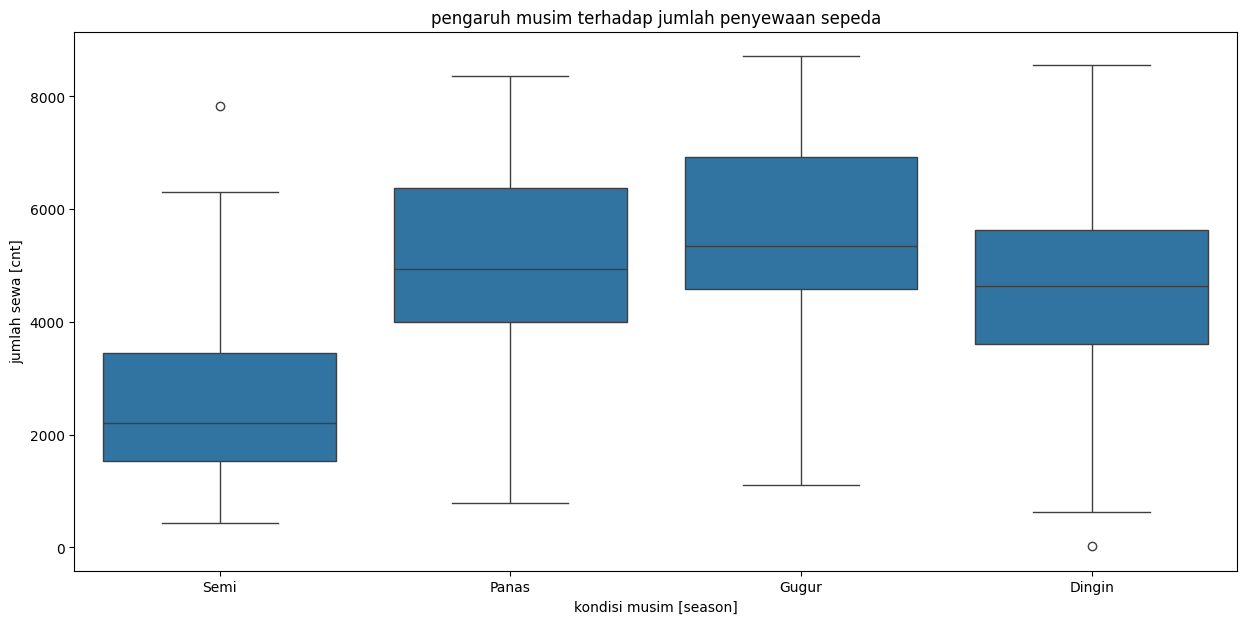

In [93]:
# Bagaimana musim dan cuaca mempengaruhi jumlah sepeda yang disewa

plt.figure(figsize=(15, 7))
sns.boxplot(x='season', y='cnt', data =day_df)
plt.title('pengaruh musim terhadap jumlah penyewaan sepeda')
plt.ylabel('jumlah sewa [cnt]')
plt.xlabel('kondisi musim [season]')
plt.xticks([0, 1, 2, 3], ['Semi', 'Panas', 'Gugur', 'Dingin'], rotation = 0)
plt.show()

### Pertanyaan 2:

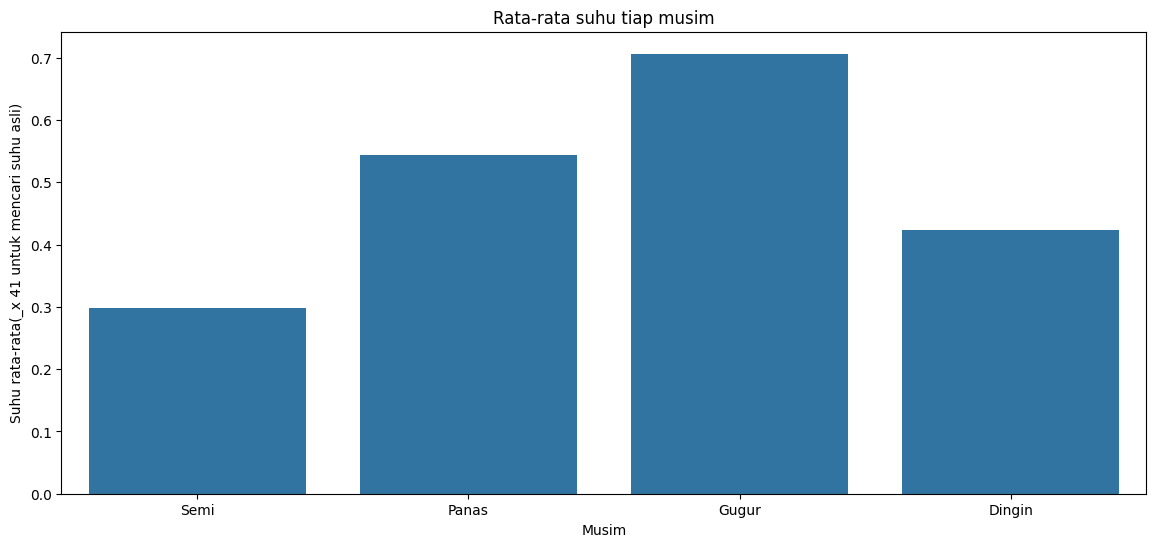

In [94]:
suhuMean= day_df.groupby('season')['temp'].mean().reset_index()
suhuMean.columns = ['Season', 'Average Temperature']

plt.figure(figsize=(14, 6))
sns.barplot(x='Season', y='Average Temperature', data=suhuMean)
plt.title('Rata-rata suhu tiap musim')
plt.ylabel('Suhu rata-rata(_x 41 untuk mencari suhu asli)')
plt.xlabel('Musim')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.show()

**Insight:**
- Suhu tertinggi terdapat pada musim gugur dan musim terendah ada pada musim semi.
- Pada cuaca badai seluruhnya tidak ada yang merental sepeda, berbeda dengan cuaca cerah dan berawan.
- Jumlah penyewaan sepeda paling banyak ada pada musim gugur diikuti oleh musim panas.

## Analisis Lanjutan (Opsional)

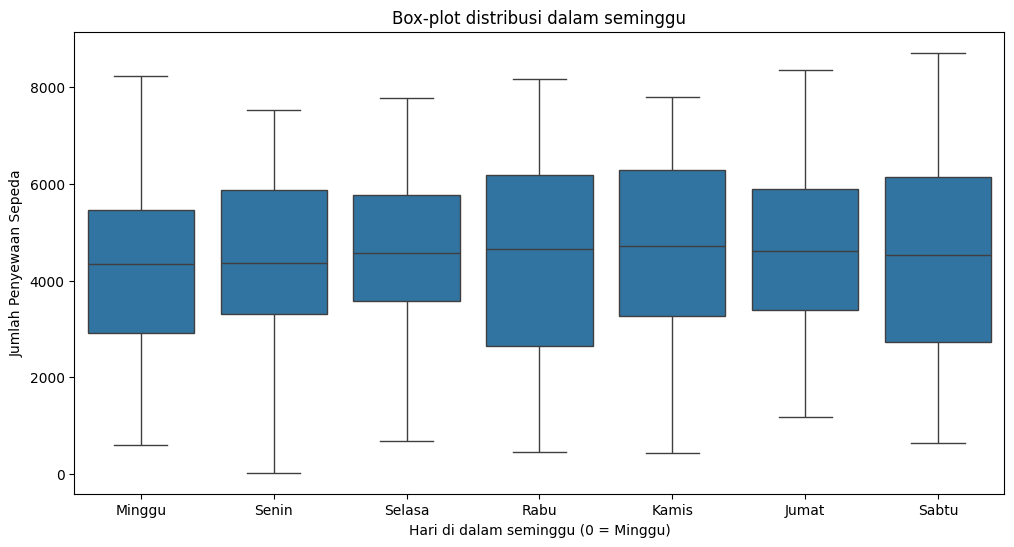

In [83]:
# Apakah terdapat perbedaan pada hari tertentu dengan penyewaan sepeda

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=day_df)
plt.title('Box-plot distribusi dalam seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xlabel('Hari di dalam seminggu (0 = Minggu)')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

**Insight**
- Rentang Penyewaan paling besar ada pada kuartal Weekend yaitu Jumat, Sabtu, dan Minggu.
- Adapun penyewaan paling banyak terjadi pada haru rabu diluar hari Weekend.

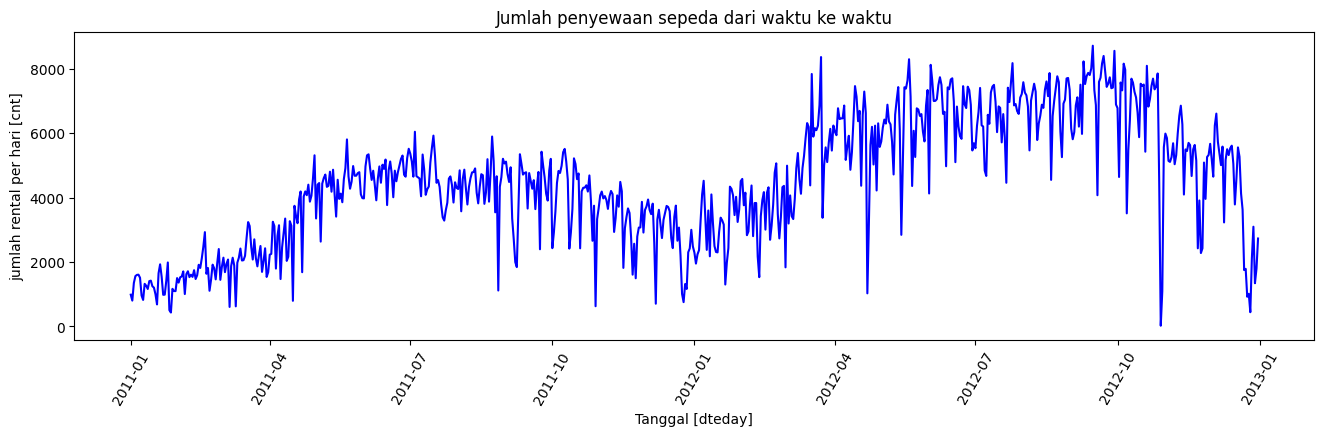

In [95]:
# Rentang perkembangan tren Penyewaan sepeda dari hari-ke-hari hingga hari terakhir survey

day_df['dteday'] = pd.to_datetime(day_df['dteday']) #dihitung per 3 bulan atau dalam satu musim
plt.figure(figsize=(16, 4))
plt.plot(day_df['dteday'], day_df['cnt'], label='Total seluruh rental', color='blue')
plt.title('Jumlah penyewaan sepeda dari waktu ke waktu')
plt.xlabel('Tanggal [dteday]')
plt.ylabel('jumlah rental per hari [cnt]')
plt.xticks(rotation=60)
plt.show()

**Insight**
- Tren Penyewaan sepeda kian hari kian meningkat, dapat dilihat pada per 3 bulannya pada bulan yang sama dengan tahun yang berbeda.
- Tren ini juga dapat berarti bahwa semakin besar juga minat pengguna pada penyewaan sepeda dalam basis sehari-hari

## Conclusion

- Bahwa pengguna yang menggunakan sepeda cendrung menyewa atau merental sepeda pada musim gugur dan musim panas dengan cuaca yang cerah dan ketika pada cuaca berawan
- Penggunaan sepeda juga diikuti oleh perbedaan musim pada musim dingin dan semi cenderung memiliki suhu pada indeks 0.3 - 0.4 berbeda pada musim panas dan musim gugur yang memiliki nilai indeks diatasnya. 

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
day_df.to_csv("day_df.csv", index=False)